# Decomposition

A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

- Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
- Non-Systematic: Components of the time series that cannot be directly modeled.

A given time series can have two systematic components, i.e., trend, seasonality, and one non-systematic component called residuals.

A series is thought to be an aggregate or combination of these components. It is helpful to think of the components as combining either **additively** or **multiplicatively**.

## Additive model

An additive model suggests that the components are added together as follows:

$$ y(t) = Trend + Seasonality + Residuals $$

An additive model is linear where changes over time are consistently made by the same amount. A linear trend is a straight line. A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

## Multiplicative model

A multiplicative model suggests that the components are multiplied together as follows:

$$ y(t) = Trend * Seasonality * Residuals $$

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time. A nonlinear trend is a curved line. A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

## Decomposition as a tool

Decomposition provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model. Each of these components is something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist. You may or may not be able to cleanly or perfectly break down your specific time series as an additive or multiplicative model. Real-world problems are messy and noisy. There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend. There may be non-repeating cycles mixed in with the repeating seasonality components. Nevertheless, these abstract models provide a simple framework that you can use to analyze your data and explore ways to think about and forecast your problem.

### Statsmodels decomposition

There are methods to automatically decompose a time series.

The statsmodels library provides an implementation of the classical decomposition method in a function called [seasonal_decompose()](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html). It requires that you specify whether the model is additive or multiplicative. Both will produce a result and you must be careful to be critical when interpreting the result. A review of a plot of the time series and some summary statistics can often be a good start to get an idea of whether your time series problem looks additive or multiplicative. The seasonal_decompose() function returns a result object. The result object contains arrays to access the pieces of data from the decomposition.

Let's import the libraries we need.

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

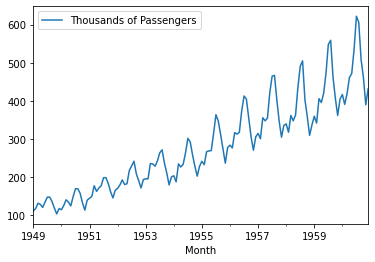

In [2]:
# import and visualize data
data_set = pd.read_csv('data/airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"],index_col=["Month"])
data_set.plot()
plt.show()

## Additive decomposition

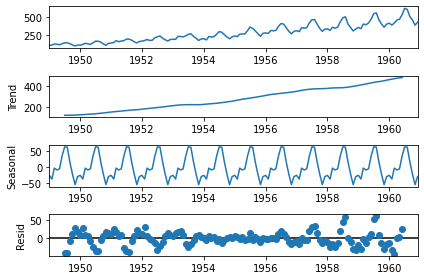

In [3]:
# decompose with additive model (seasonal, trend and resid)
add_decomposition = sm.tsa.seasonal_decompose(data_set, model = 'additive')
x = add_decomposition.plot()

## Multiplicative decomposition

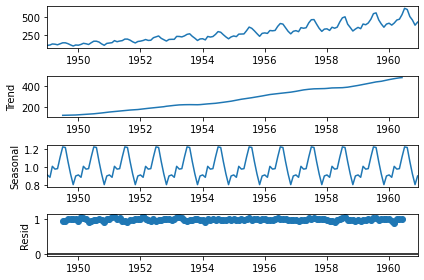

In [4]:
mul_decomposition = sm.tsa.seasonal_decompose(data_set, model = 'multiplicative')
x = mul_decomposition.plot()

In [5]:
mul_decomposition.trend[10:15]

Month
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
Name: trend, dtype: float64

In [6]:
mul_decomposition.seasonal[10:15]

Month
1949-11-01    0.801178
1949-12-01    0.898824
1950-01-01    0.910230
1950-02-01    0.883625
1950-03-01    1.007366
Name: seasonal, dtype: float64

In [7]:
mul_decomposition.resid[10:15]

Month
1949-11-01    1.006270
1949-12-01    1.011812
1950-01-01    0.962603
1950-02-01    1.071467
1950-03-01    1.037447
Name: resid, dtype: float64

## Stationarity check after decomposition

We can check the summary statistics over time and the ADF output to assess which type of decomposition is more suitable with the Airline Passenger dataset.

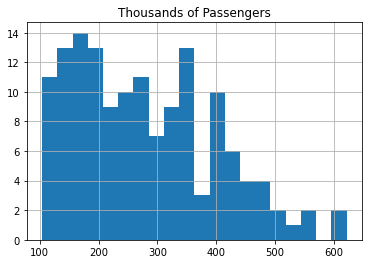

In [8]:
# plot distribution of values
data_set.hist(bins=20)[0][0]
plt.show()

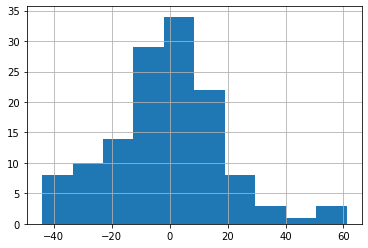

In [9]:
# plot distribution of data without trend and seasonality
add_decomposition.resid.hist()
plt.show()

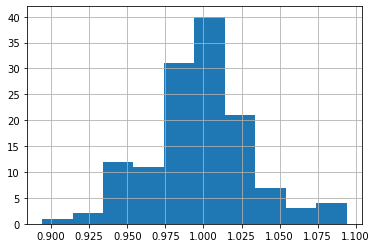

In [10]:
# plot distribution of data without trend and seasonality
mul_decomposition.resid.hist()
plt.show()

In [11]:
# check if mean and variance of the dataset are constant
n = int(add_decomposition.resid.shape[0]/2)
print("mean of the entire dataset {:0.2f}, the first half {:0.2f}, and the second half {:0.2f}".format(data_set.mean()[0], data_set[:n].mean()[0], data_set[n:].mean()[0]))
print("std-dev of the entire dataset {:0.2f}, the first half {:0.2f}, and the second half {:0.2f}".format(sqrt(data_set.var()[0]), sqrt(data_set[:n].var()[0]), sqrt(data_set[n:].var()[0])))

mean of the entire dataset 280.30, the first half 182.90, and the second half 377.69
std-dev of the entire dataset 119.97, the first half 47.70, and the second half 86.44


In [12]:
# check if mean and variance of the residual off the additive decomposition are constant
print("mean of the entire dataset {:0.2f}, the first half {:0.2f}, and the second half {:0.2f}".format(add_decomposition.resid.mean(), add_decomposition.resid[:n].mean(), add_decomposition.resid[n:].mean()))
print("std-dev of the entire dataset {:0.2f}, the first half {:0.2f}, and the second half {:0.2f}".format(sqrt(add_decomposition.resid.var()), sqrt(add_decomposition.resid[:n].var()), sqrt(add_decomposition.resid[n:].var())))

mean of the entire dataset -0.75, the first half -0.82, and the second half -0.68
std-dev of the entire dataset 19.34, the first half 17.99, and the second half 20.74


In [13]:
# check if mean and variance of the residual off the multiplicative decomposition are constant
print("mean of the entire dataset {:0.2f}, the first half {:0.2f}, and the second half {:0.2f}".format(mul_decomposition.resid.mean(), mul_decomposition.resid[:n].mean(), mul_decomposition.resid[n:].mean()))
print("std-dev of the entire dataset {:0.2f}, the first half {:0.2f}, and the second half {:0.2f}".format(sqrt(mul_decomposition.resid.var()), sqrt(mul_decomposition.resid[:n].var()), sqrt(mul_decomposition.resid[n:].var())))

mean of the entire dataset 1.00, the first half 1.00, and the second half 1.00
std-dev of the entire dataset 0.03, the first half 0.04, and the second half 0.03


In [14]:
df = add_decomposition.resid.dropna()

# ADF Test
# where the null hypothesis is the time series possesses a unit root and is non-stationary. 
# So, if the P-Value in ADF test is less than the significance level (0.05), you reject the null hypothesis. 

result = adfuller(df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -5.298427587050729
p-value: 5.516868902226369e-06
Critical Values:
   1%, -3.4870216863700767
Critical Values:
   5%, -2.8863625166643136
Critical Values:
   10%, -2.580009026141913


In [15]:
df = mul_decomposition.resid.dropna()

# ADF Test
# where the null hypothesis is the time series possesses a unit root and is non-stationary. 
# So, iF the P-Value in ADF test is less than the significance level (0.05), you reject the null hypothesis.

result = adfuller(df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -7.415924640885215
p-value: 6.936028992599353e-11
Critical Values:
   1%, -3.484219653271961
Critical Values:
   5%, -2.885145235641637
Critical Values:
   10%, -2.579359138917794


### By looking at the results, in your opinion which decomposition is better with this time series?